# Iris Data Set Project
Author: Myles Henehan<br/>Student Number: G00439446<br/>Module: Programming and Scripting

## Background of the Iris Data Set

First introduced in 1936 by British statistician Ronald Fisher in his paper titled "The use of multiple measurements in taxonomic problems," the Iris Data set is a staple in the field of data science, and serves as a simple, straightforward source through which beginners in the field of data analytics can build up their knowledge.

The data set contains 150 instances, split evenly between 3 different types (otherwise known as classes) of Iris flower. These types are setosa, versicolor, and virginica. Moreover, each flower has 4 different features (or variables): sepal length, sepal width, petal length and petal width. This combination of classes and variables gives students in the field of data science a simple, yet all-encompassing set of data through which to explore data representation methods using Python.

## Libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Overview

In [40]:
file = 'iris/iris.data'
df = pd.read_csv(file, header=None)
print(df)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


Since the dataset doesn't have headers, we will assign each data series to the right variables, using the information in the iris.names file for reference

In [41]:
sepallen = df[0]
sepalwidth = df[1]
petallen = df[2]
petalwidth = df[3]
species = df[4]

## Variable Types

In [42]:
sepallendescription = sepallen.describe()
sepalwidthdescription = sepalwidth.describe()
petallendescription = petallen.describe()
petalwidthdescription = petalwidth.describe()

with open('Irisvariabledescriptions.txt', 'w') as ivd:
    ivd.write("Here is a description of the sepal length variable:\n")
    ivd.write(sepallendescription.to_string() + "\n\n")

    ivd.write("Here is a description of the sepal width variable:\n")
    ivd.write(sepalwidthdescription.to_string() + "\n\n")

    ivd.write("Here is a description of the petal length variable:\n")
    ivd.write(petallendescription.to_string() + "\n\n")

    ivd.write("Here is a description of the petal width variable:\n")
    ivd.write(petalwidthdescription.to_string() + "\n\n")

## Histograms

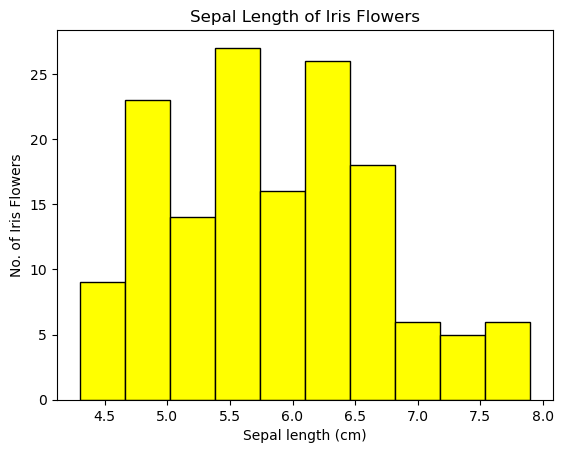

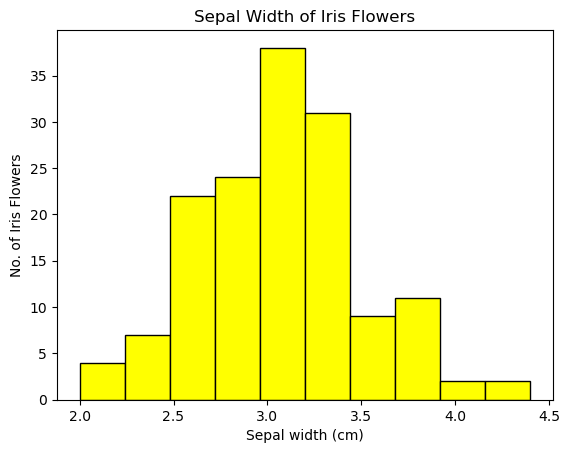

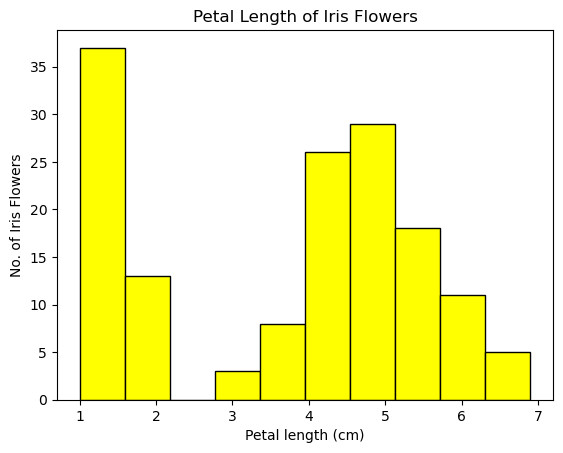

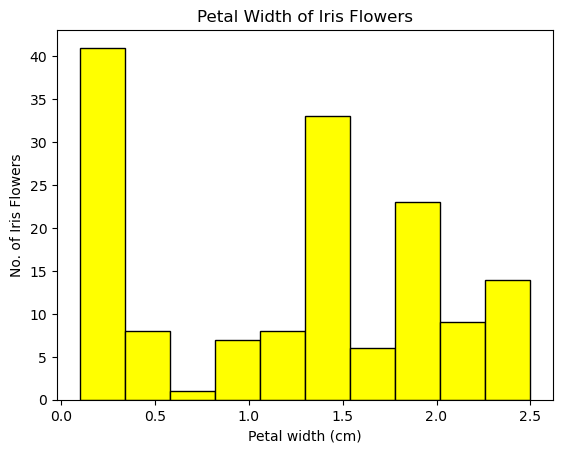

In [43]:
from irisfunctions import irisdatahist

#Sepal Length
irisdatahist(sepallen, 'Sepal length (cm)', 'Sepal Length of Iris Flowers', 'sepallen_histogram.png')

# Sepal Width
irisdatahist(sepalwidth, 'Sepal width (cm)', 'Sepal Width of Iris Flowers', 'sepalwidth_histogram.png')

# Petal Length
irisdatahist(petallen, 'Petal length (cm)', 'Petal Length of Iris Flowers', 'petallen_histogram.png')

# Petal Width
irisdatahist(petalwidth, 'Petal width (cm)', 'Petal Width of Iris Flowers', 'petalwidth_histogram.png')

## Scatter Plots

In [44]:
#sepallen = sepallen.to_numpy()
#sepalwidth = sepalwidth.to_numpy()
#petallen = petallen.to_numpy()
#petalwidth = petalwidth.to_numpy()

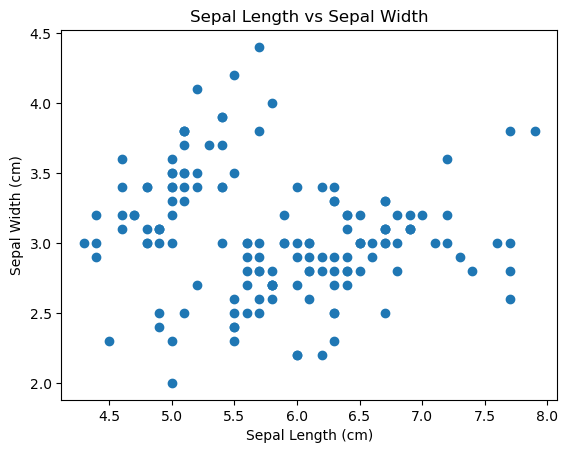

In [45]:
# Sepal Length

plt.scatter(sepallen, sepalwidth)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

# Show the plot
plt.show()

In [46]:
# Create a dictionary
irisdict = {
    "Sepal Length (cm)": sepallen,
    "Sepal Width (cm)": sepalwidth,
    "Petal Length (cm)": petallen,
    "Petal Width (cm)": petalwidth
}


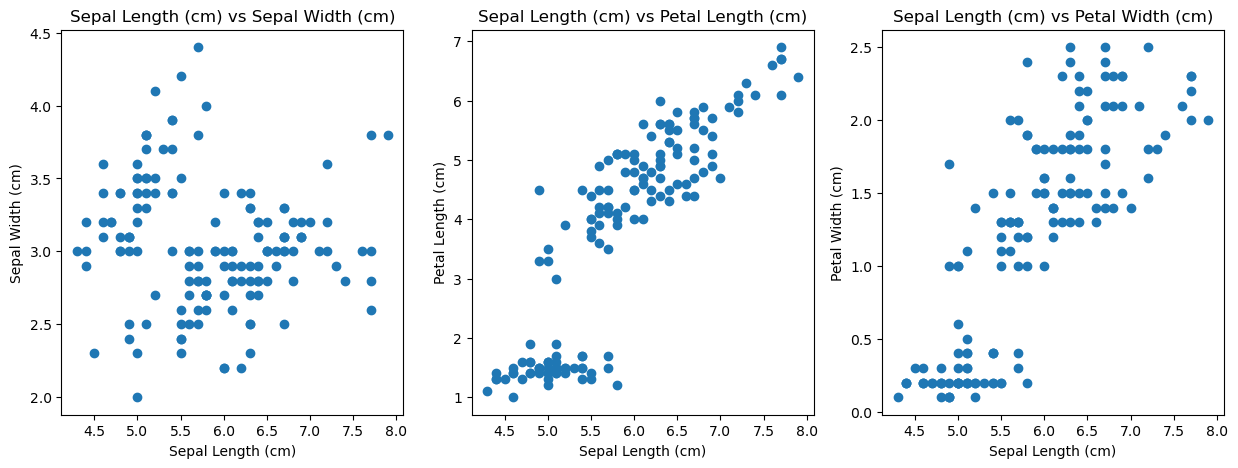

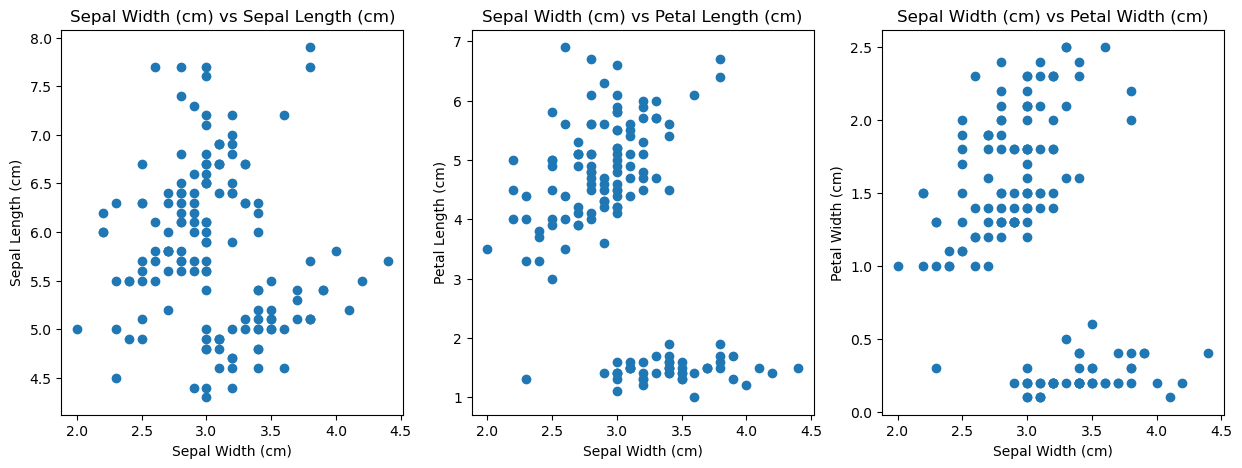

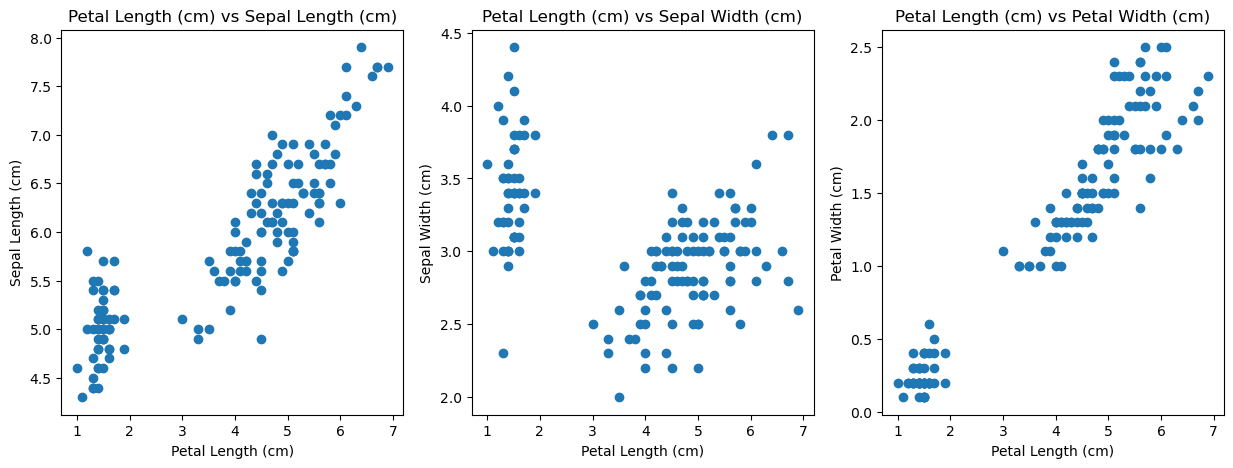

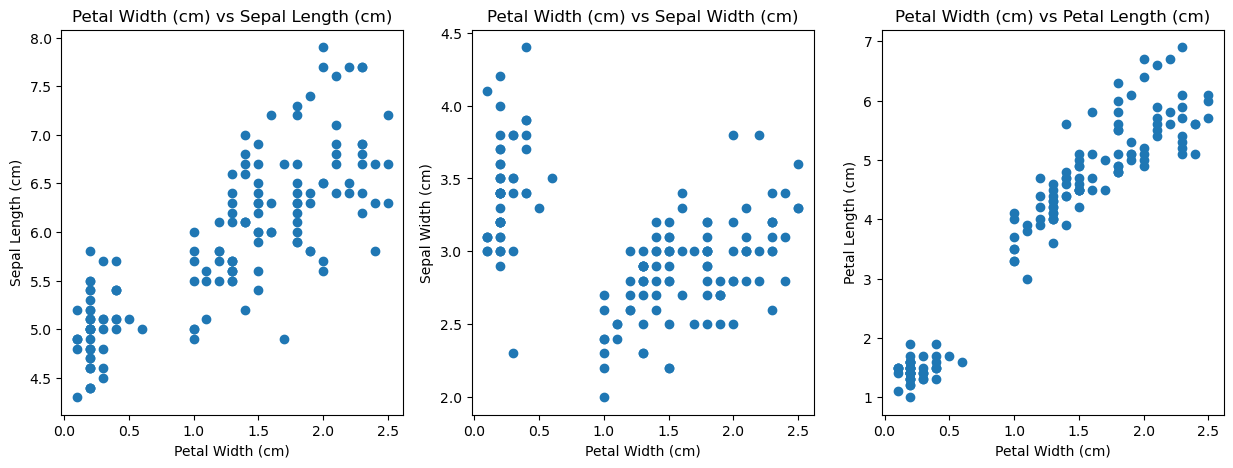

In [56]:
def scatterplots(x_variable, y_variables, irisdict): #Create scatter plots with each variable as the x-axis against the specified y variables.
    
   # Parameters:
    #    x_variable (str): The variable to use as the x-axis.
    #    y_variables (list of str): The list of variables to use as the y-axis.
    #    irisdict (dict): The dictionary containing the Iris dataset.
   
    # Create a figure with subplots
    fig, axs = plt.subplots(1, len(y_variables), figsize=(15, 5))
    
    # Plot each variable against the x_variable
    for i, var in enumerate(y_variables):
        axs[i].scatter(irisdict[x_variable], irisdict[var])
        axs[i].set_xlabel(x_variable)
        axs[i].set_ylabel(var)
        axs[i].set_title(f"{x_variable} vs {var}")

# Define the variables and other_variables
variables = ["Sepal Length (cm)", "Sepal Width (cm)", "Petal Length (cm)", "Petal Width (cm)"]
othervariables = ["Sepal Width (cm)", "Petal Length (cm)", "Petal Width (cm)"]

for xvar in variables:
    # Define other variables excluding the current xvar
    other_vars = [var for var in variables if var != xvar]
    scatterplots(xvar, other_vars, irisdict)


 Plan:
 - Finish making scatter plots for each set of variables
 - pick out the interesting ones:
    - do a best fit line and Pearson's for one that looks linear
    - for one that is in clusters, add species as a third variable


When looking at scatter plots, it can often be useful to work out the best fit line to visualise the overall trend in the data. For example, when you look at Petal Length versus Petal Width above, you can see quite a linear progression of the data. Let's use a best fit line to demonstrate this. In order to plot this, we will first need to determine the slope of the line and the point at which it intercepts the y axis, and then use the y = mx + c method.

In [52]:
m, c = np.polyfit(petallen, petalwidth, 1) # The .polyfit function takes a set of data points (x, y) and fits a polynomial of specified degree to the data. The degree 1 here represents a straight line.
m, c # Here, "m" represents the slope, while "c" represents the intercept of the line. Let's make this clear for ease of reference by assigning them to more easy-to-understand variables.

slope = m
intercept = c

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')

Slope: 0.4164191322854009
Intercept: -0.36651404521672726


Now we can plot the best fit line by fitting our data into the y = mx + c equation:

Text(0, 0.5, 'Petal Width (cm)')

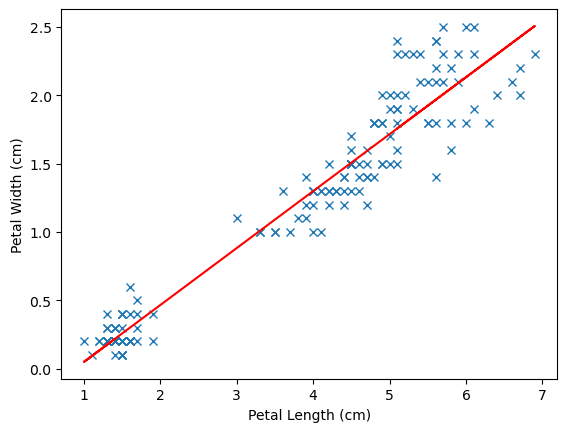

In [51]:
fig, ax = plt.subplots()
ax.plot(petallen, petalwidth, 'x')

ax.plot(petallen, slope * petallen + intercept, 'r-') #This time we're adding another plot command to insert our best fit line, with "r-" representing a solid red line.
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')

### Pearson Correlation Coefficient
Another way to measure the correlation between these two variables would be to look at the Pearson correlation coefficient. This method measures the extent to which the points in a scatter plot cluster around a straight line, and is widely used in statistics and data analysis to assess the relationship between two continuous variables.

In [ ]:
r = petallen.corr(petalwidth) # .corr() is a pandas function which calculates correlation between two data frames, using the Pearson correlation coefficient by default.
print("Pearson correlation coefficient:", r)

Pearson correlation coefficient: 0.9627570970509659


As you can see above, the Pearson's correlation coefficient is over 0.96. This coefficient can range between 0 and 1, with 0 implying no correlation, 1 implying a very positive correlation, and -1 implying a very negative correlation (Turney, 2022). As such, in this case, the Pearson coefficient implies a definite positive correlation between petal length and petal width. This is in line with the concept of "allometric scaling" in biology, where as species grow larger, their proportions tend to remain consistent.

### Introducing a Third Variable

Sometimes when making a scatter plot, the data can appear in clusters. In this case, it is common that a categorical variable is affecting the data. In this case, I believe the species of flowers is affecting the distribution. Let's look at Petal Length vs Width again. While the data does suggest a linear regression, we can see here two clusters of data. Let's 

KeyError: 'species'

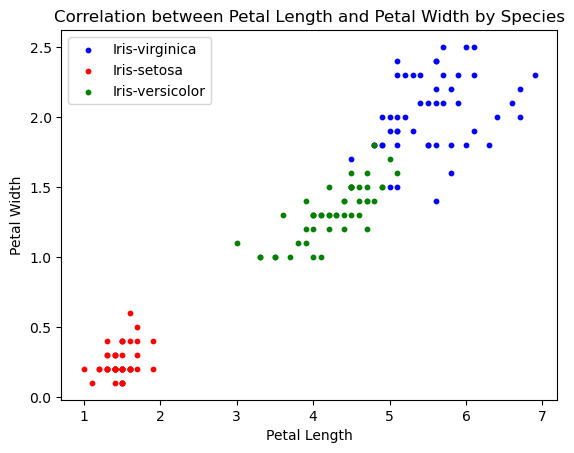

In [57]:
fig, ax = plt.subplots()

colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}


for s in set(species):
    ax.scatter(petallen[species == s], petalwidth[species == s], c=colors[s], label=s, s=10)
    
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_title('Correlation between Petal Length and Petal Width by Species')

ax.legend()

import seaborn as sns # We have to import the module seaborn in order to do this. Method found through Seaborn documentation (Waskom, n.d.)
for group, subset in df.groupby('species'):
    sns.regplot(data=subset, x='petallen', y='petalwidth', scatter=False, label=group)

## Conclusion

## References

Fisher,R. A.. (1988). Iris. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.

Turney, S. (2022). "Pearson Correlation Coefficient (r) | Guide & Examples". Available at: https://www.scribbr.com/statistics/pearson-correlation-coefficient/#:~:text=The%20Pearson%20correlation%20coefficient%20(r,the%20relationship%20between%20two%20variables [Accessed 14 May 2024]

Waskom, M. (n.d.). "Visualizing statistical relationships". Available at: https://seaborn.pydata.org/tutorial/relational.html [Accessed 14 May 2024]